In [83]:
import pandas as pd
import numpy as np
import seaborn as sns

In [84]:
bikes = pd.read_csv("data/bikes.csv")

In [85]:
bikes.head()

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
0,1/1/2017 0:38,1/1/2017 1:03,3194,McGinley Square,3271,Danforth Light Rail,24668,Subscriber,1961,60,55-64,1513,25,1,Winter,10,Sunday
1,1/1/2017 1:47,1/1/2017 1:58,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
2,1/1/2017 1:47,1/1/2017 1:58,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
3,1/1/2017 1:56,1/1/2017 2:00,3186,Grove St PATH,3270,Jersey & 6th St,24604,Subscriber,1970,51,45-54,258,4,1,Winter,10,Sunday
4,1/1/2017 2:12,1/1/2017 2:23,3270,Jersey & 6th St,3206,Hilltop,24641,Subscriber,1978,43,35-44,663,11,1,Winter,10,Sunday


In [86]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Start Time            20400 non-null  object
 1   Stop Time             20400 non-null  object
 2   Start Station ID      20400 non-null  int64 
 3   Start Station Name    20400 non-null  object
 4   End Station ID        20400 non-null  int64 
 5   End Station Name      20399 non-null  object
 6   Bike ID               20400 non-null  int64 
 7   User Type             20400 non-null  object
 8   Birth Year            20400 non-null  int64 
 9   Age                   20400 non-null  int64 
 10  Age Groups            20400 non-null  object
 11  Trip Duration         20400 non-null  int64 
 12  Trip_Duration_in_min  20400 non-null  int64 
 13  Month                 20400 non-null  int64 
 14  Season                20400 non-null  object
 15  Temperature           20400 non-null

In [87]:
bikes["Start Time"] = pd.to_datetime(bikes["Start Time"])
bikes["Stop Time"] = pd.to_datetime(bikes["Stop Time"])

In [88]:
bikes.dtypes

Start Time              datetime64[ns]
Stop Time               datetime64[ns]
Start Station ID                 int64
Start Station Name              object
End Station ID                   int64
End Station Name                object
Bike ID                          int64
User Type                       object
Birth Year                       int64
Age                              int64
Age Groups                      object
Trip Duration                    int64
Trip_Duration_in_min             int64
Month                            int64
Season                          object
Temperature                      int64
Weekday                         object
dtype: object

In [89]:
print(bikes['Start Time'].isna().sum())
print(bikes['Stop Time'].isna().sum())

0
0


In [90]:
# Identify rows and columns with inf values
inf_rows = bikes[bikes.isin([float('inf'), -float('inf')]).any(axis=1)].index
inf_cols = bikes.columns[bikes.isin([float('inf'), -float('inf')]).any()]

print("Rows with infinite values:")
print(inf_rows)

print("\nColumns with infinite values:")
print(inf_cols)

Rows with infinite values:
Index([], dtype='int64')

Columns with infinite values:
Index([], dtype='object')


In [91]:
bikes.replace([np.inf, -np.inf], np.nan, inplace=True)

In [92]:
# Check for inf values
print(bikes.isin([float('inf'), -float('inf')]).sum())

Start Time              0
Stop Time               0
Start Station ID        0
Start Station Name      0
End Station ID          0
End Station Name        0
Bike ID                 0
User Type               0
Birth Year              0
Age                     0
Age Groups              0
Trip Duration           0
Trip_Duration_in_min    0
Month                   0
Season                  0
Temperature             0
Weekday                 0
dtype: int64


In [93]:
bikes.isna().sum()

Start Time              0
Stop Time               0
Start Station ID        0
Start Station Name      0
End Station ID          0
End Station Name        1
Bike ID                 0
User Type               0
Birth Year              0
Age                     0
Age Groups              0
Trip Duration           0
Trip_Duration_in_min    0
Month                   0
Season                  0
Temperature             0
Weekday                 0
dtype: int64

In [94]:
bikes = bikes.dropna()
bikes.isna().sum()

Start Time              0
Stop Time               0
Start Station ID        0
Start Station Name      0
End Station ID          0
End Station Name        0
Bike ID                 0
User Type               0
Birth Year              0
Age                     0
Age Groups              0
Trip Duration           0
Trip_Duration_in_min    0
Month                   0
Season                  0
Temperature             0
Weekday                 0
dtype: int64

In [95]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20399 entries, 0 to 20399
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Start Time            20399 non-null  datetime64[ns]
 1   Stop Time             20399 non-null  datetime64[ns]
 2   Start Station ID      20399 non-null  int64         
 3   Start Station Name    20399 non-null  object        
 4   End Station ID        20399 non-null  int64         
 5   End Station Name      20399 non-null  object        
 6   Bike ID               20399 non-null  int64         
 7   User Type             20399 non-null  object        
 8   Birth Year            20399 non-null  int64         
 9   Age                   20399 non-null  int64         
 10  Age Groups            20399 non-null  object        
 11  Trip Duration         20399 non-null  int64         
 12  Trip_Duration_in_min  20399 non-null  int64         
 13  Month                

<Axes: xlabel='Age'>

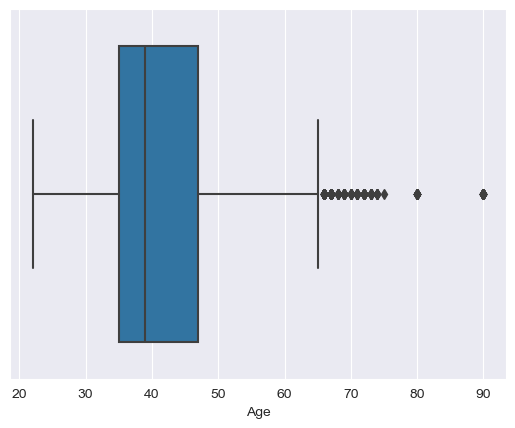

In [96]:
# boxplot to check for outliers
sns.boxplot(x=bikes["Age"])

<Axes: xlabel='Trip_Duration_in_min'>

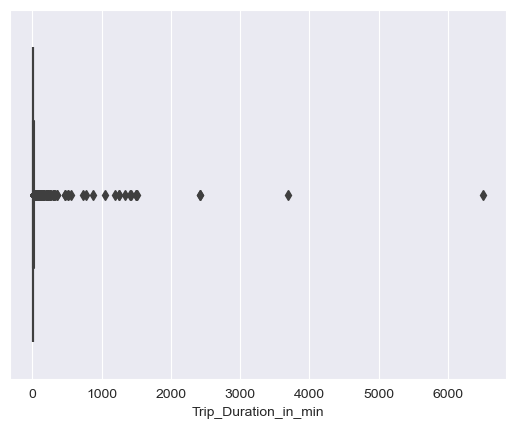

In [97]:
# boxplot to check for outliers
sns.boxplot(x=bikes["Trip_Duration_in_min"])

<Axes: xlabel='Trip Duration'>

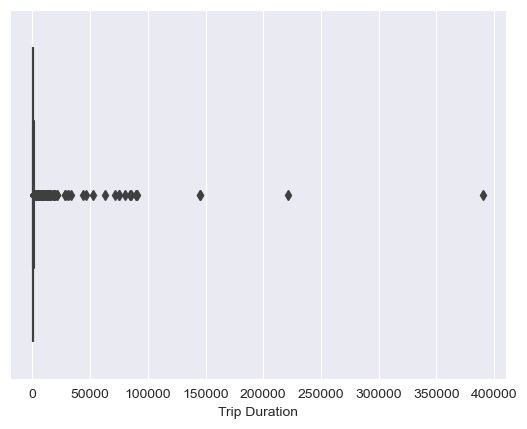

In [98]:
# boxplot to check for outliers
sns.boxplot(x=bikes["Trip Duration"])

In [99]:
def detect_and_remove_outliers(data, columns):
    for col in columns:
        # Calculate the lower and upper bounds for outliers
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Remove outliers
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Columns to check for outliers
columns_to_check = ['Age', 'Trip_Duration_in_min', 'Trip Duration']

# Apply the function to remove outliers
bikes = detect_and_remove_outliers(bikes, columns_to_check)

<Axes: xlabel='Age'>

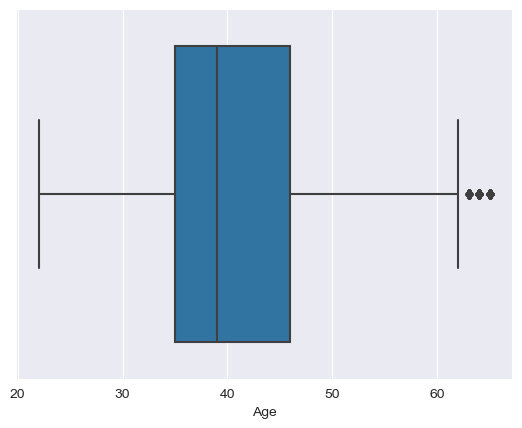

In [100]:
# boxplot to check for outliers
sns.boxplot(x=bikes["Age"])

<Axes: xlabel='Trip_Duration_in_min'>

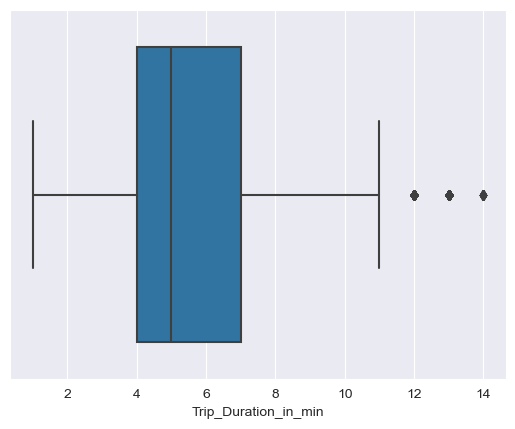

In [101]:
# boxplot to check for outliers
sns.boxplot(x=bikes["Trip_Duration_in_min"])

<Axes: xlabel='Trip Duration'>

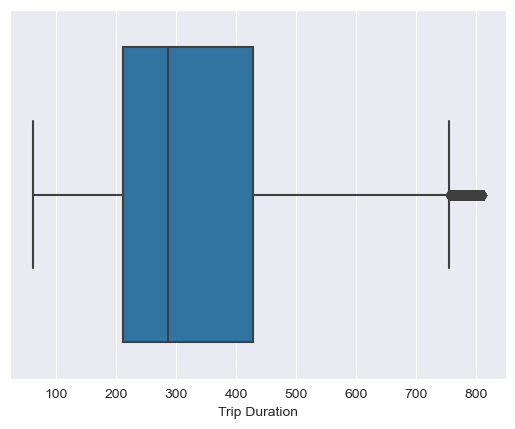

In [102]:
# boxplot to check for outliers
sns.boxplot(x=bikes["Trip Duration"])

In [103]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17886 entries, 1 to 20399
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Start Time            17886 non-null  datetime64[ns]
 1   Stop Time             17886 non-null  datetime64[ns]
 2   Start Station ID      17886 non-null  int64         
 3   Start Station Name    17886 non-null  object        
 4   End Station ID        17886 non-null  int64         
 5   End Station Name      17886 non-null  object        
 6   Bike ID               17886 non-null  int64         
 7   User Type             17886 non-null  object        
 8   Birth Year            17886 non-null  int64         
 9   Age                   17886 non-null  int64         
 10  Age Groups            17886 non-null  object        
 11  Trip Duration         17886 non-null  int64         
 12  Trip_Duration_in_min  17886 non-null  int64         
 13  Month                

In [104]:
# save the cleaned data
bikes.to_csv("data/bikes_clean.csv", index=False)